# 2016 Primary Election Results
### A Data Visualization Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

##### Import Data

In [3]:
primary_results = pd.read_csv('/users/veronicaventure/Documents/primary_results.csv')
primary_results.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [4]:
uscities=pd.read_excel('/users/veronicaventure/Documents/uscities.xlsx')
uscities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371


In [5]:
#create df with only 'state_name','county_name','lat','lng'
county_info= uscities[['state_name','county_name','lat','lng']]
county_info.head()

,state_name,county_name,lat,lng
0,Washington,Pierce,46.9994,-122.3921
1,Washington,Kittitas,47.2507,-121.0989
2,Washington,Lincoln,47.3048,-117.9713
3,Washington,Pierce,47.3352,-122.5968
4,Washington,Snohomish,48.0639,-122.0920


##### Merge DataFrames

In [7]:
#rename columns
new_county=county_info.rename(columns={'state_name':'state', 'county_name':'county'})
new_county.head(20)
#drop duplicates
new_county2=new_county.drop_duplicates(['state','county'],keep= 'last')

In [8]:
#merge dataframes on state and county
geo_data=pd.merge(new_county2, primary_results, how='left', on=['state','county'])
geo_data.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
0,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Bernie Sanders,255.0,0.770
1,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Hillary Clinton,76.0,0.230
2,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Republican,Donald Trump,8727.0,0.800
3,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Republican,John Kasich,777.0,0.071
4,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Republican,Ted Cruz,991.0,0.091


##### Scatter plot of all votes for all candidates in all counties using pandas

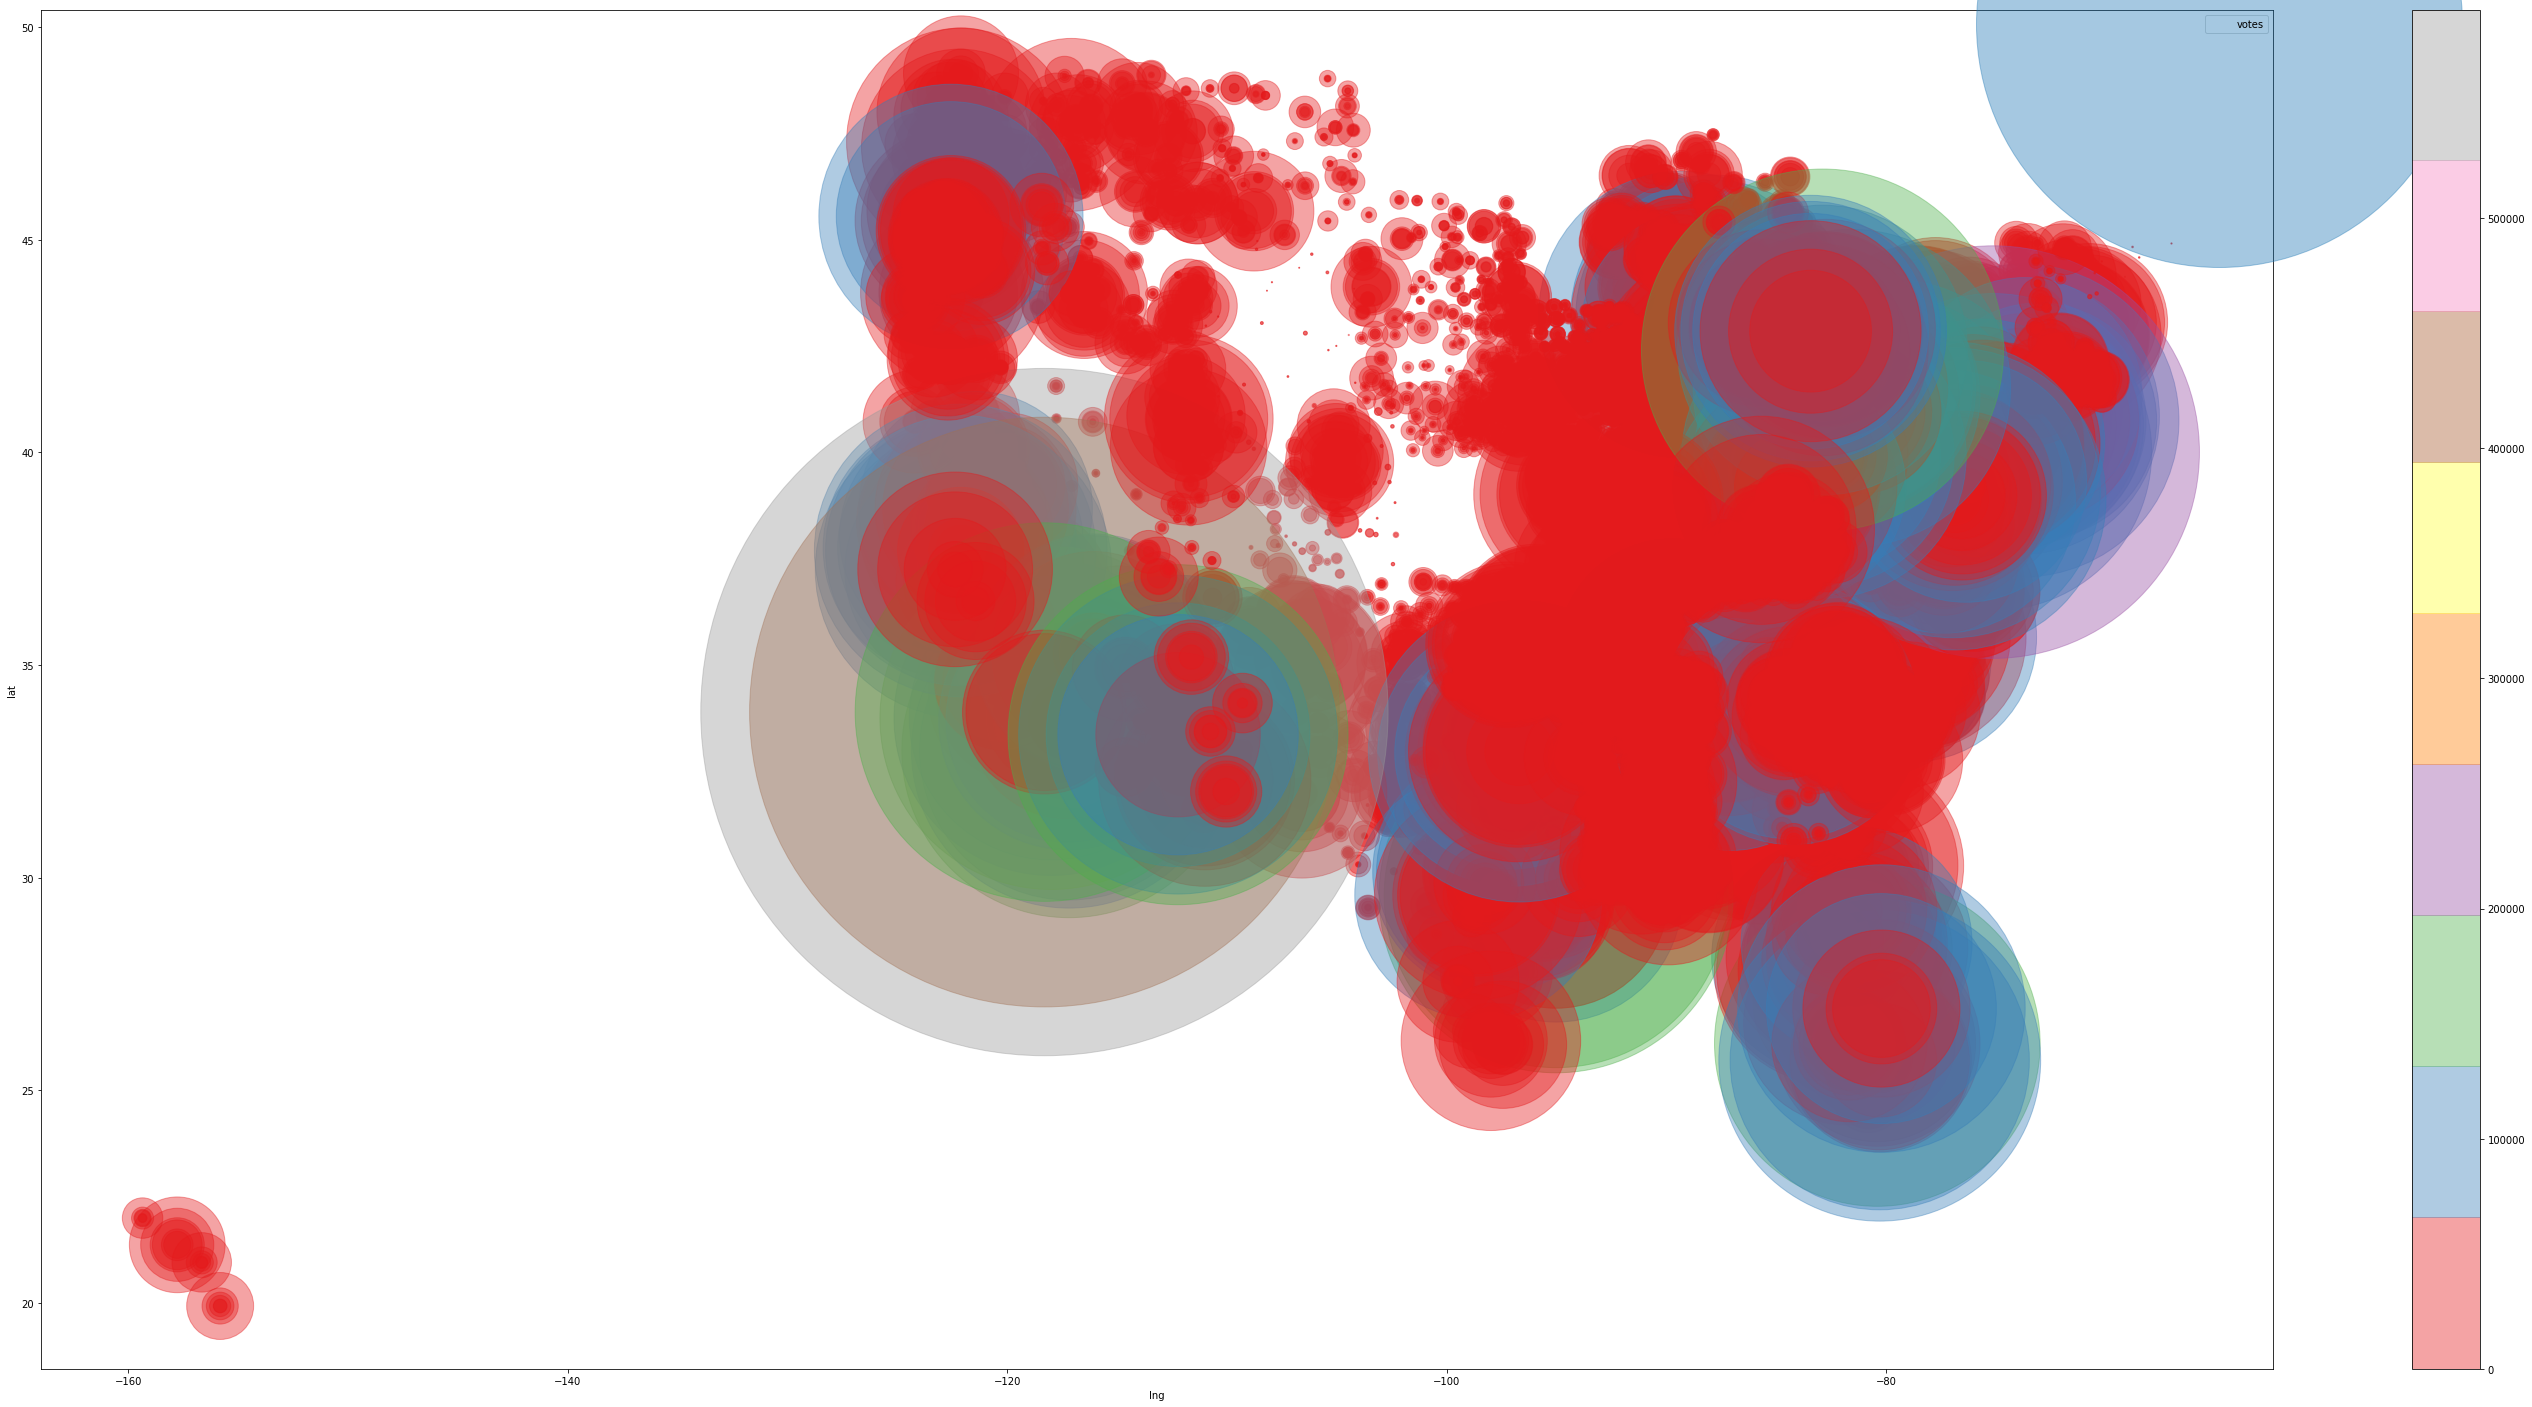

In [9]:
#of votes for all candidates in all counties
geo_data.plot(kind = "scatter",
             x = 'lng',
             y = 'lat',
             figsize = (50,25),
             alpha = 0.4,
             s = geo_data['votes']*.8,
             label = 'votes',
              c= geo_data['votes'],
              cmap= 'Set1'
           );

The size and color of the circles show the number of votes, but the plot does not not distunguish between candidates.

##### Scatter plot of all votes for all candidates in all counties using matplotlib

Text(0,0.5,'Latitude')

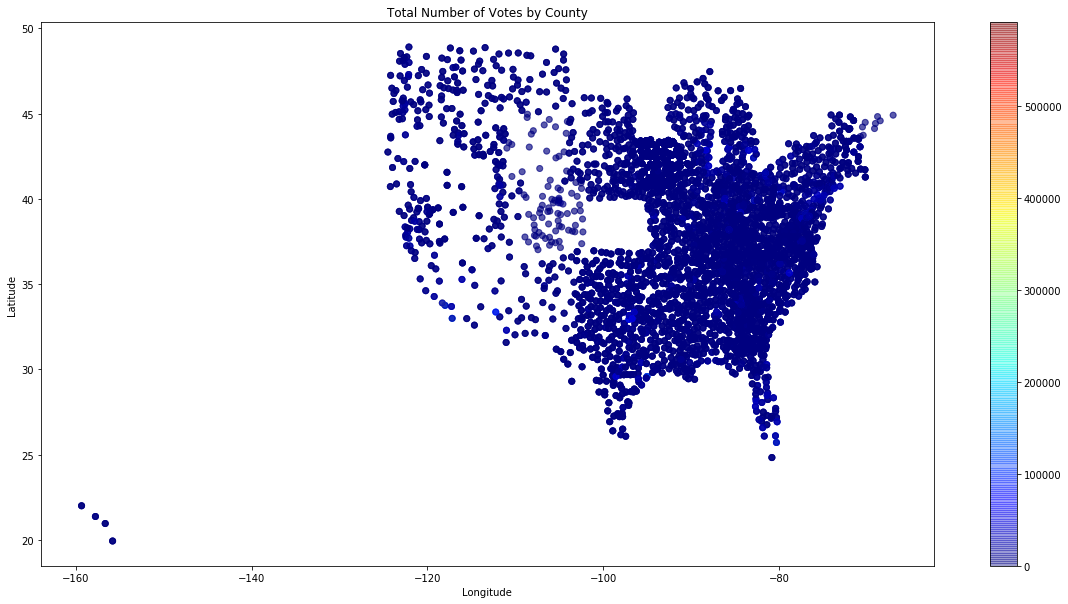

In [10]:
#number of votes for all candidates in all counties
fig = plt.figure(figsize=(20,10))
plt.scatter(geo_data.lng, geo_data.lat, c= geo_data.votes, cmap='jet', alpha=.4)
plt.colorbar()
plt.title("Total Number of Votes by County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

##### Let's look at only the results for Hillary Clinton

In [11]:
#create df with only Hillary data
hillary=primary_results.loc[primary_results['candidate']=='Hillary Clinton']
hillary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


In [12]:
#merge data to get longitiude and latitude
hillary_geo=pd.merge(new_county2, hillary, how='left', on=['state','county'])
hillary_geo.head()




,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
0,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Hillary Clinton,76.0,0.230
1,Washington,San Juan,48.5324,-123.0655,WA,53055.0,Democrat,Hillary Clinton,25.0,0.240
2,Washington,Pend Oreille,48.8540,-117.3899,WA,53051.0,Democrat,Hillary Clinton,10.0,0.222
3,Washington,Garfield,46.4737,-117.5967,WA,53023.0,Democrat,Hillary Clinton,2.0,0.400
4,Washington,Chelan,47.5948,-120.6633,WA,53007.0,Democrat,Hillary Clinton,63.0,0.283


Text(0,0.5,'latitude')

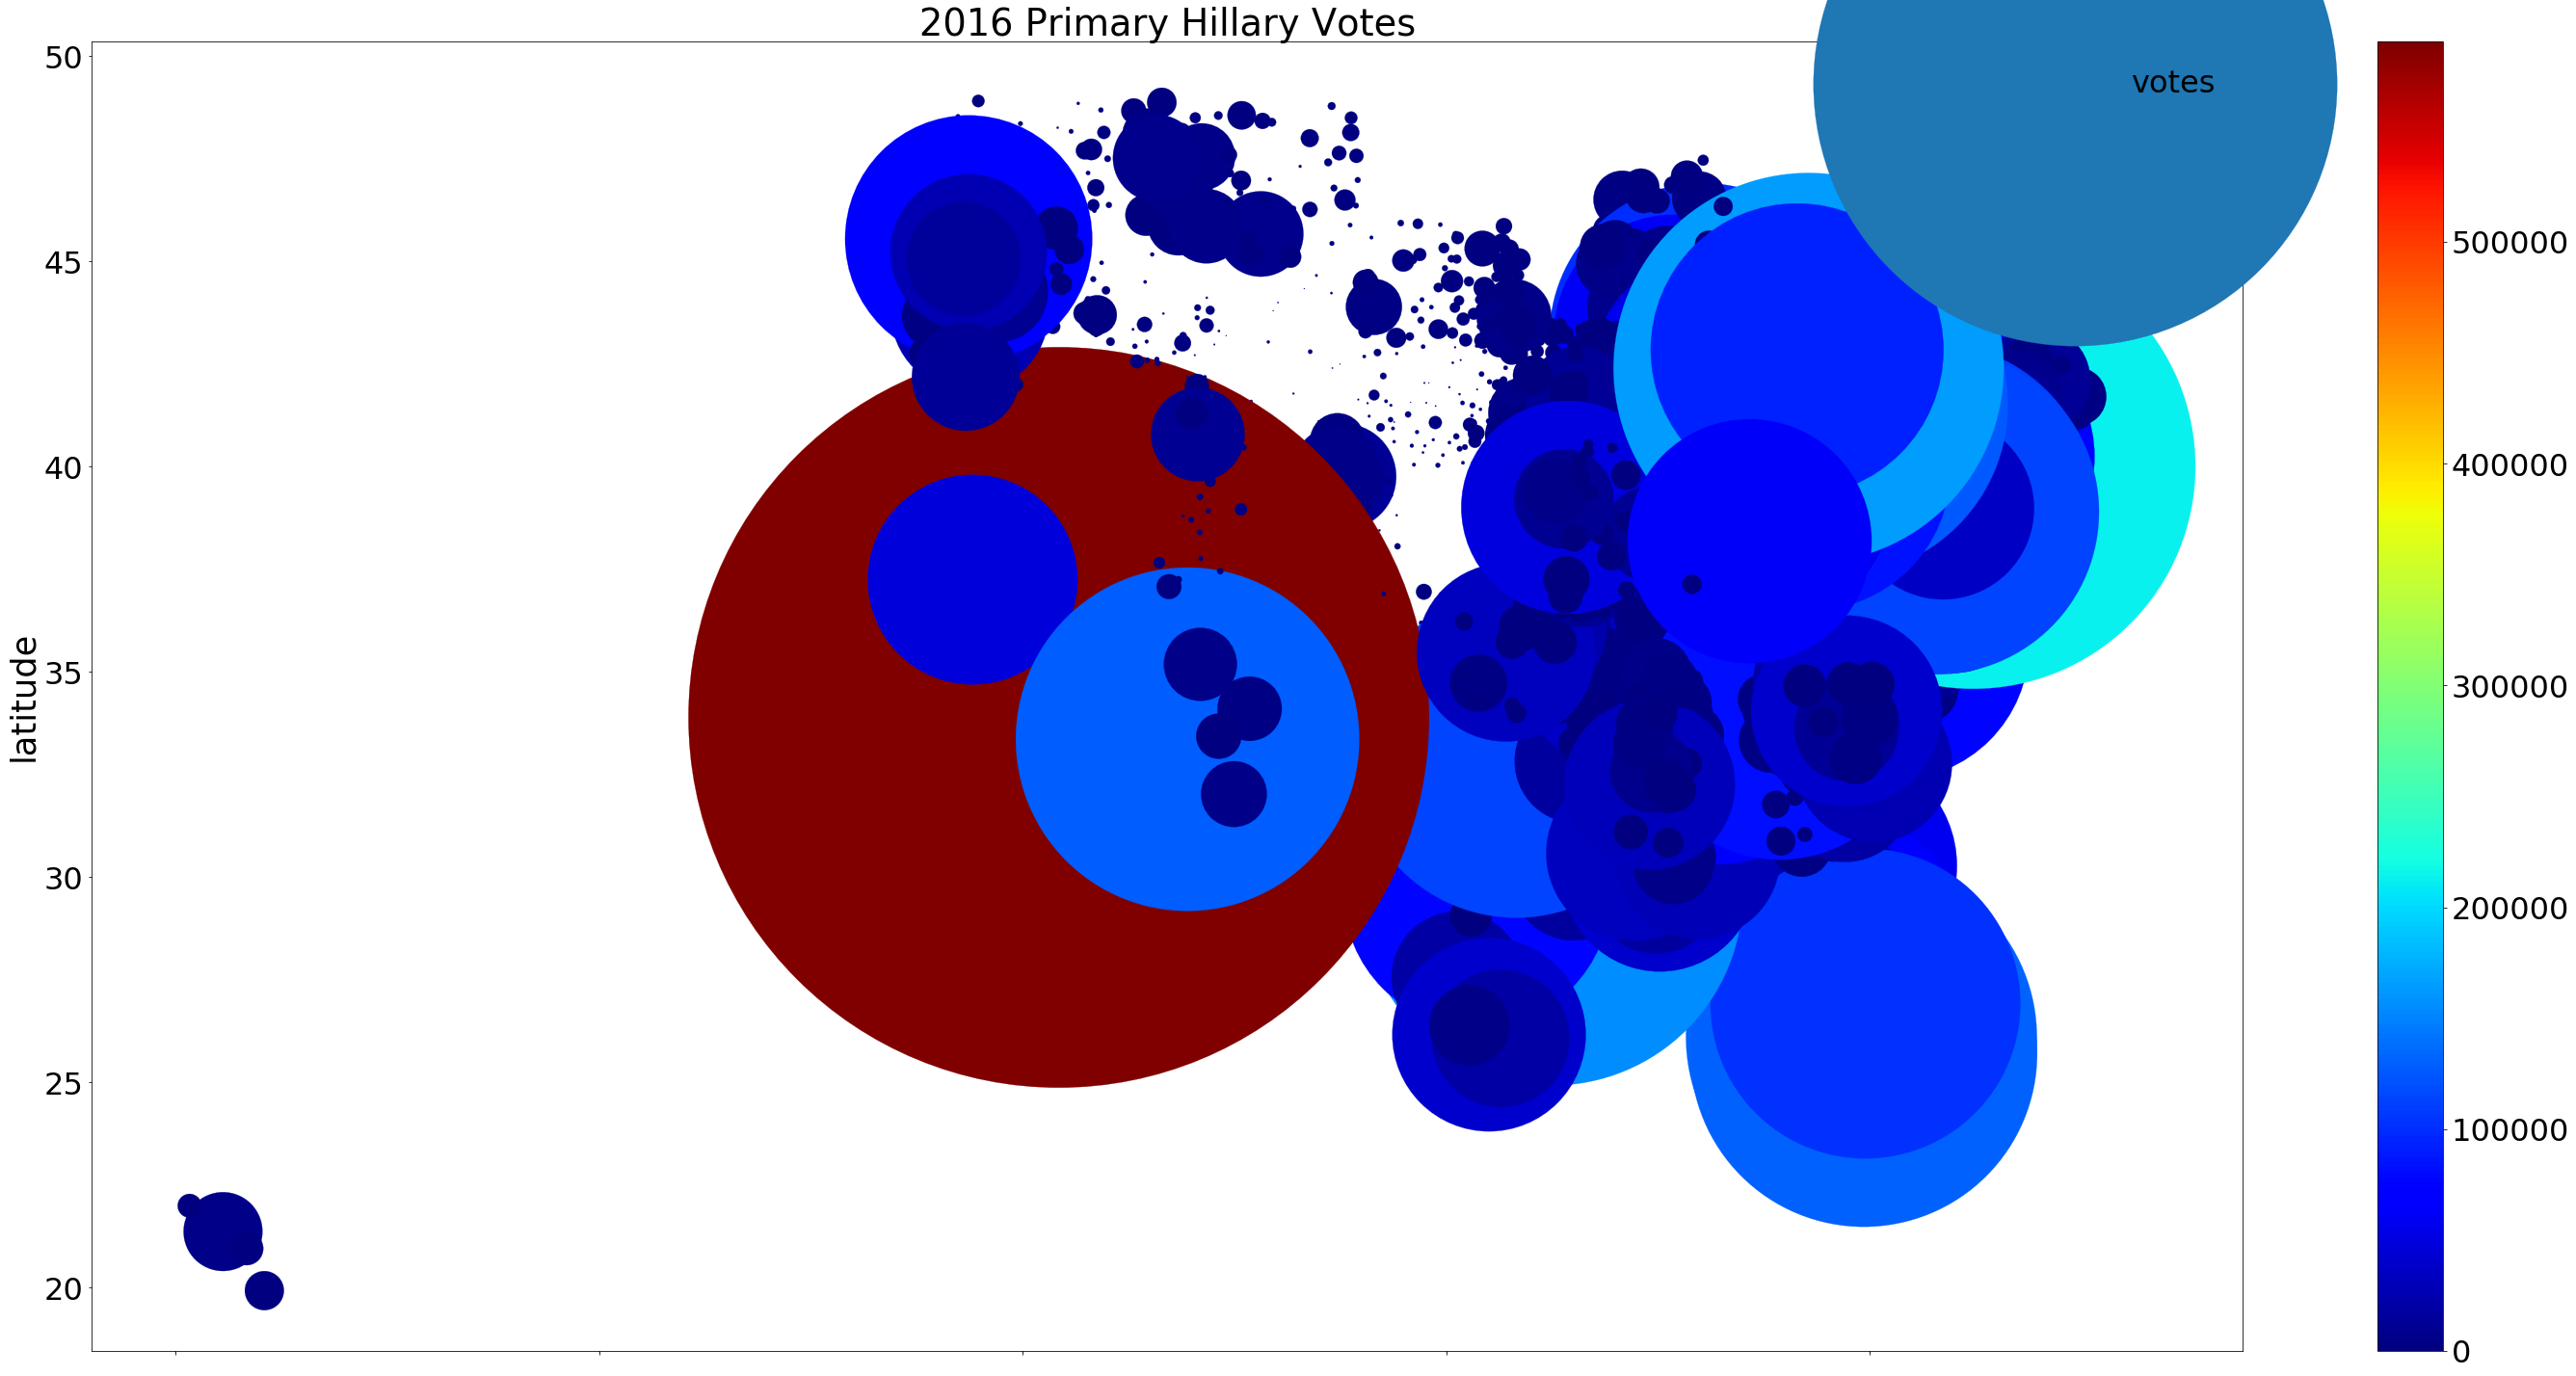

In [25]:
#number of votes in each county
ax= hillary_geo.plot(kind = "scatter",
             x = 'lng',
             y = 'lat',
             figsize = (50,25),
             alpha = 1,
             s = hillary_geo['votes'],
             label = 'votes',
             c= hillary_geo['votes'],
             cmap='jet',
             colorbar= True,
             title='2016 Primary Hillary Votes', 
            
           );
ax.set_xlabel("longitude")
ax.set_ylabel('latitude')
#s = hillary_geo['votes'] changes the size of each dot based on number of votes

The plot shows the number of votes (by size and color) for Hillary Clinton in each county.
Size of the circles can be uniform is the the argument  's=' is commented out.

Text(0,0.5,'Latitude')

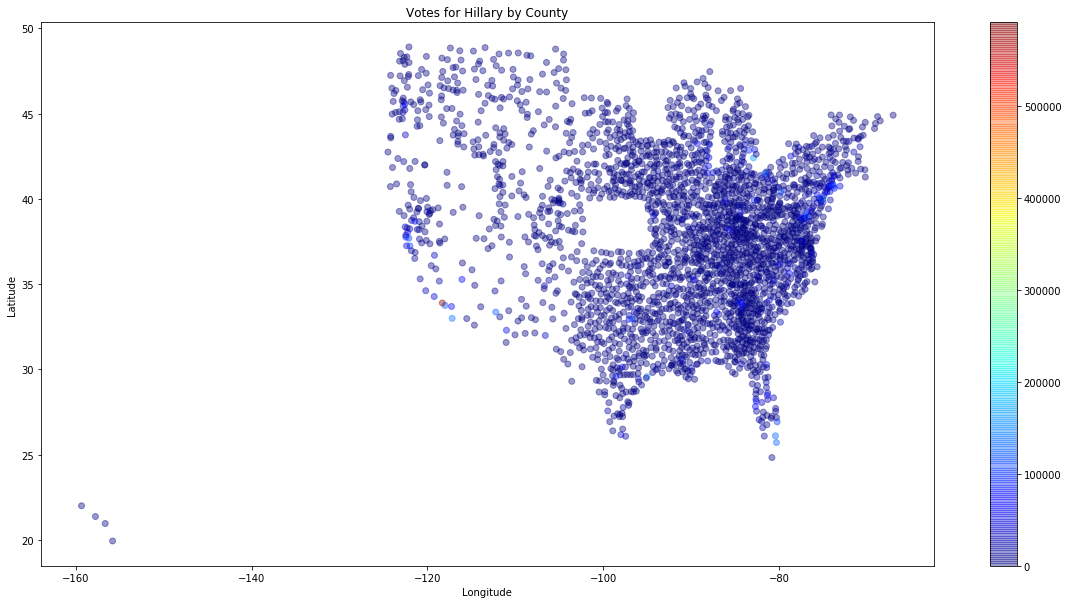

In [13]:
#number of votes in each county for hillary
fig = plt.figure(figsize=(20,10))
plt.scatter(hillary_geo.lng, hillary_geo.lat, c= hillary_geo.votes, cmap='jet', alpha=.4)
plt.colorbar()
plt.title("Votes for Hillary by County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

##### Now let's see who had the most votes in each county

In [14]:
#sort data by state, county and votes
sorted_geo=geo_data.sort_values(by=['state','county','votes'])

In [15]:
#create new DF with one row for each county that has the candidate with the most votes
top_votes=sorted_geo.drop_duplicates(['state','county'],keep= 'last')
top_votes.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
7946,Alabama,Autauga,32.5797,-86.4529,AL,1001.0,Republican,Donald Trump,5387.0,0.445
7932,Alabama,Baldwin,31.0034,-87.6323,AL,1003.0,Republican,Donald Trump,23618.0,0.469
8091,Alabama,Barbour,31.6635,-85.5035,AL,1005.0,Democrat,Hillary Clinton,2567.0,0.906
7799,Alabama,Bibb,32.9421,-87.1753,AL,1007.0,Republican,Donald Trump,1959.0,0.494
8030,Alabama,Blount,33.9965,-86.5671,AL,1009.0,Republican,Donald Trump,7390.0,0.487


Text(0.5,0.98,'Distribution of Votes by Candidate')

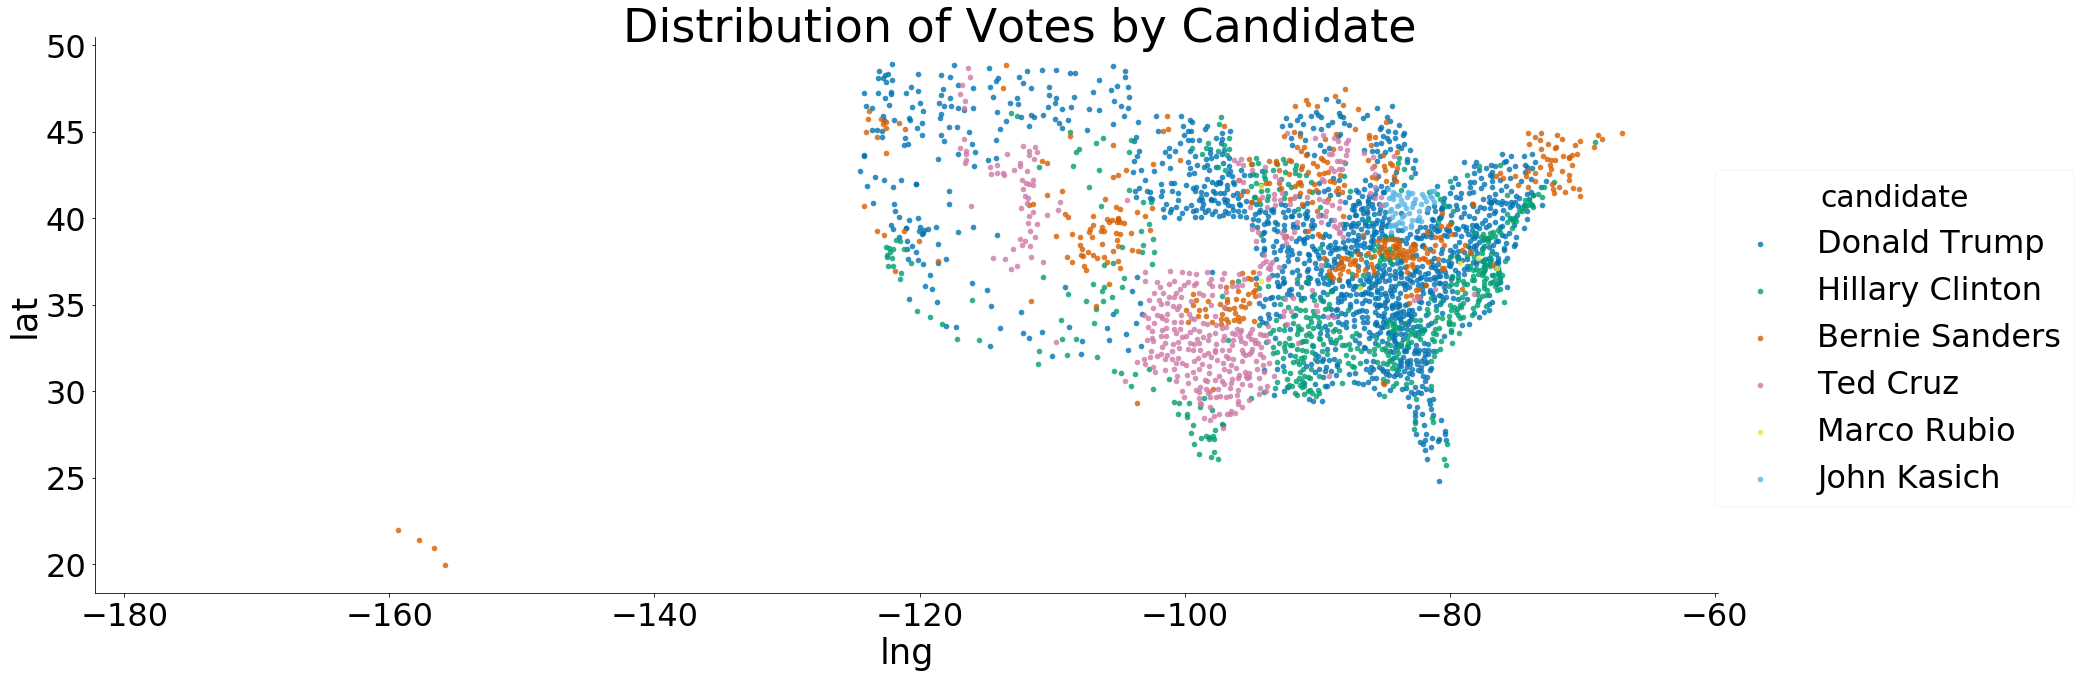

In [16]:
#show top canididate in each county
sns.set_context('paper', font_scale=4)
sns.lmplot('lng', 'lat', data=top_votes, 
           hue='candidate', 
           palette='colorblind', 
           fit_reg=False, size=10, aspect=2.5).fig.suptitle("Distribution of Votes by Candidate")

##### Create a map with only information about votes for Hillary and Bernie

In [17]:
#create new Df with only hillary and bernie
array = ['Hillary Clinton', 'Bernie Sanders']
dem_data=geo_data.loc[geo_data['candidate'].isin(array)]
dem_data.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
0,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Bernie Sanders,255.0,0.770
1,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Hillary Clinton,76.0,0.230
5,Washington,San Juan,48.5324,-123.0655,WA,53055.0,Democrat,Bernie Sanders,79.0,0.760
6,Washington,San Juan,48.5324,-123.0655,WA,53055.0,Democrat,Hillary Clinton,25.0,0.240
10,Washington,Pend Oreille,48.8540,-117.3899,WA,53051.0,Democrat,Bernie Sanders,35.0,0.778


In [18]:
#sort dem_data by state, county and votes
sorted_dem=dem_data.sort_values(by=['state','county','votes'])

In [19]:
#create new DF with one row for each county that has the candidate with the most votes
top_dem=sorted_dem.drop_duplicates(['state','county'],keep= 'last')
top_dem.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
7944,Alabama,Autauga,32.5797,-86.4529,AL,1001.0,Democrat,Hillary Clinton,2387.0,0.800
7930,Alabama,Baldwin,31.0034,-87.6323,AL,1003.0,Democrat,Hillary Clinton,5290.0,0.647
8091,Alabama,Barbour,31.6635,-85.5035,AL,1005.0,Democrat,Hillary Clinton,2567.0,0.906
7797,Alabama,Bibb,32.9421,-87.1753,AL,1007.0,Democrat,Hillary Clinton,942.0,0.755
8028,Alabama,Blount,33.9965,-86.5671,AL,1009.0,Democrat,Hillary Clinton,564.0,0.551


Text(0.5,0.98,'Distribution of Democrat Votes by Candidate')

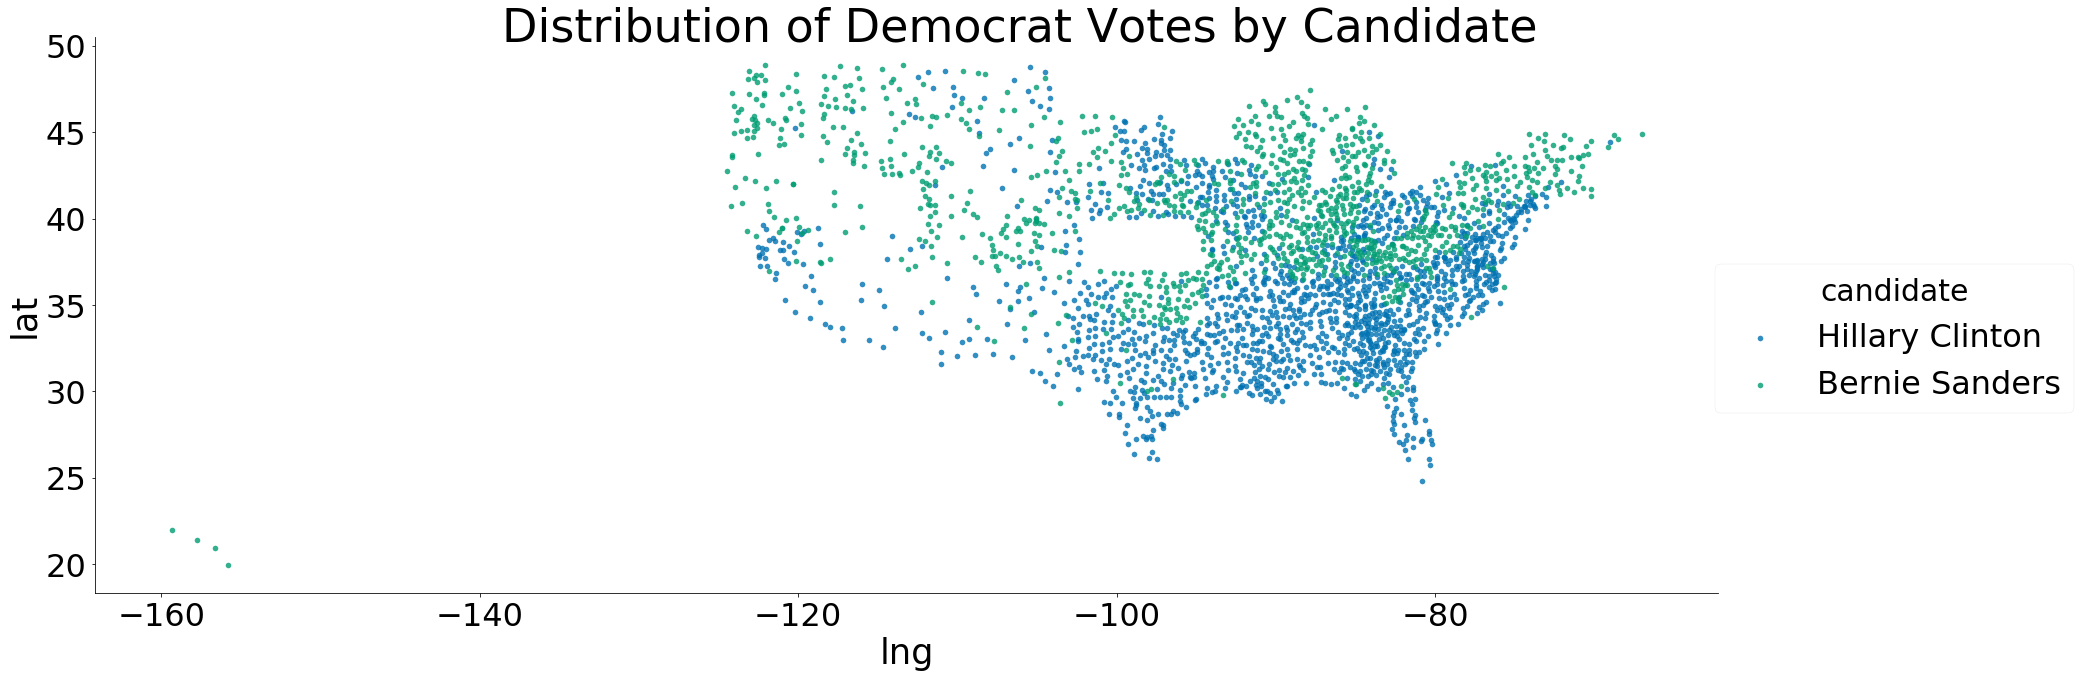

In [20]:
sns.set_context('paper', font_scale=4)
sns.lmplot('lng', 'lat', data=top_dem, 
           hue='candidate', 
           palette='colorblind', 
           fit_reg=False, size=10, aspect=2.5).fig.suptitle("Distribution of Democrat Votes by Candidate")

##### Create a heatmap of votes for top 6 candidates

In [44]:
#count votes for each candidate in each state and make it a DF
state_data=geo_data.groupby(['state','candidate']).votes.sum().reset_index()
#state_data.head()
array2 = ['Hillary Clinton', 'Bernie Sanders', 'Donald Trump', 'Ted Cruz', 'Marco Rubio', 'John Kasich']
top_candidates=state_data.loc[state_data['candidate'].isin(array2)]
top_candidates.head(20)

,state,candidate,votes
1,Alabama,Bernie Sanders,76399.0
2,Alabama,Donald Trump,371735.0
3,Alabama,Hillary Clinton,309928.0
4,Alabama,John Kasich,37970.0
5,Alabama,Marco Rubio,159802.0
6,Alabama,Ted Cruz,180608.0
7,Arizona,Bernie Sanders,163400.0
8,Arizona,Donald Trump,249916.0
9,Arizona,Hillary Clinton,235697.0
10,Arizona,John Kasich,53040.0


In [46]:
list(top_candidates.columns) 

['state', 'candidate', 'votes']

In [47]:
# Let's pivot this dataframe do its easier to manage
#df.pivot('row_names', 'column_names', 'data')
#top_candidates.fillna(0)
#top_candidates = top_candidates.pivot("state","candidate","votes", fill_value=0)
top_candidates=pd.pivot_table(top_candidates, index='state', columns=['candidate'], values='votes', fill_value=0)
#Show
top_candidates.head()


candidate,Bernie Sanders,Donald Trump,Hillary Clinton,John Kasich,Marco Rubio,Ted Cruz
state,,,,,,
Alabama,76399,371735,309928,37970,159802,180608
Arizona,163400,249916,235697,53040,0,132147
Arkansas,64514,132546,142668,15079,100999,123379
California,1502043,1174829,1940580,176620,0,144125
Colorado,71928,0,49256,0,0,0


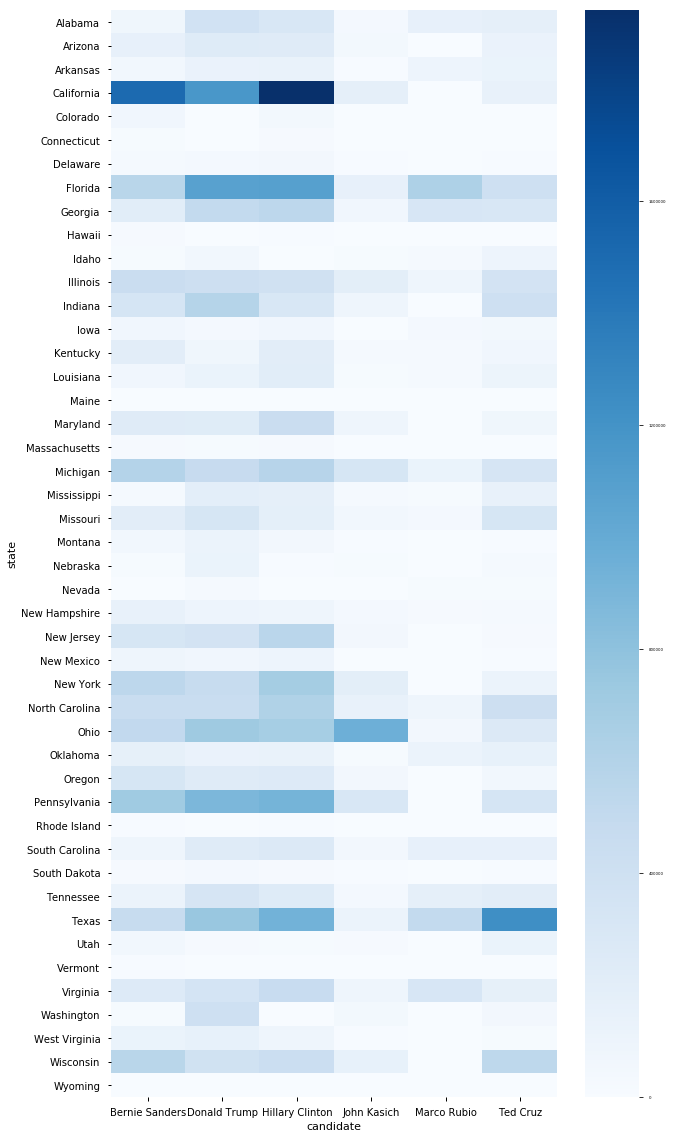

In [59]:
fig, ax = plt.subplots(figsize=(10,20))
sns.set_context('paper', font_scale=.5)
sns.heatmap(top_candidates, cmap='Blues', xticklabels=True, yticklabels=True)

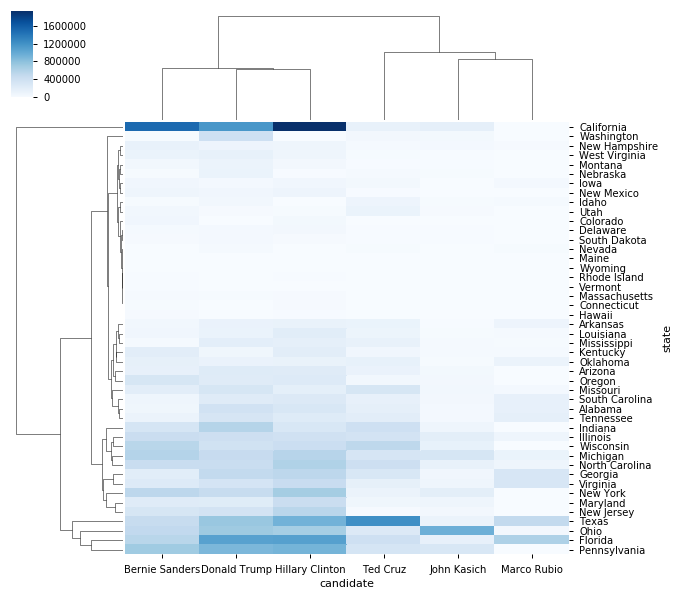

In [68]:
plt.figure(figsize=(10, 20))
sns.set_context('notebook', font_scale=1)
sns.clustermap(top_candidates, cmap='Blues',xticklabels=True, yticklabels=True)

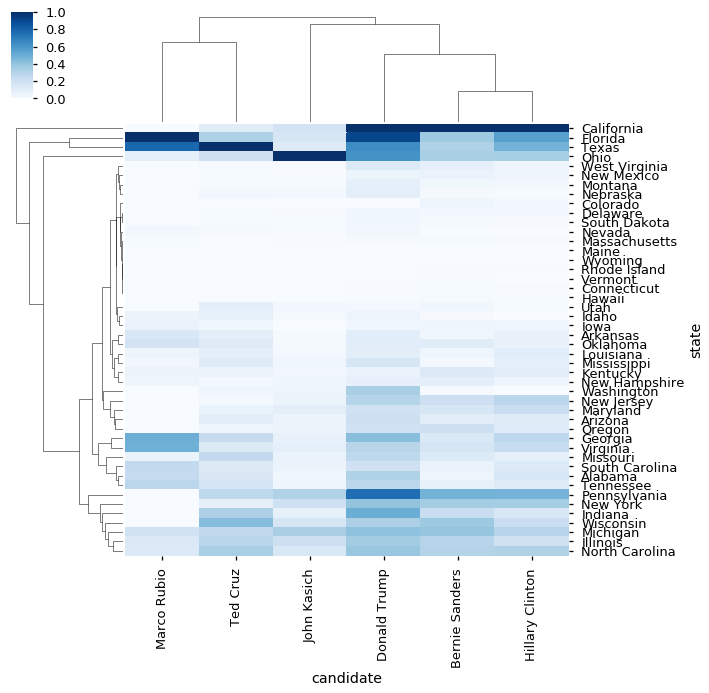

In [69]:
plt.figure(figsize=(10,20))
sns.set_context('talk', font_scale=1)
sns.clustermap(top_candidates, standard_scale=1, cmap='Blues',xticklabels=True, yticklabels=True)

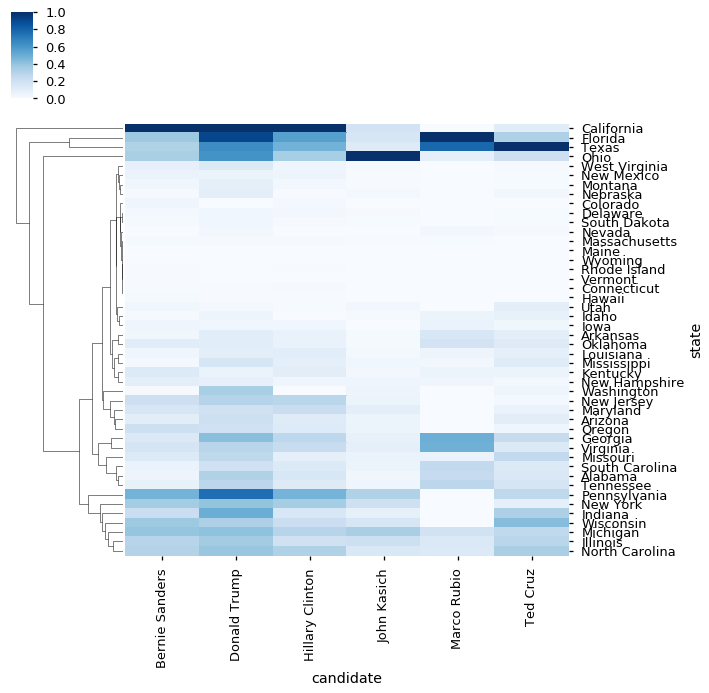

In [70]:
sns.set_context('talk', font_scale=1)
sns.clustermap(top_candidates, standard_scale=1, cmap='Blues', col_cluster=False,xticklabels=True, yticklabels=True )

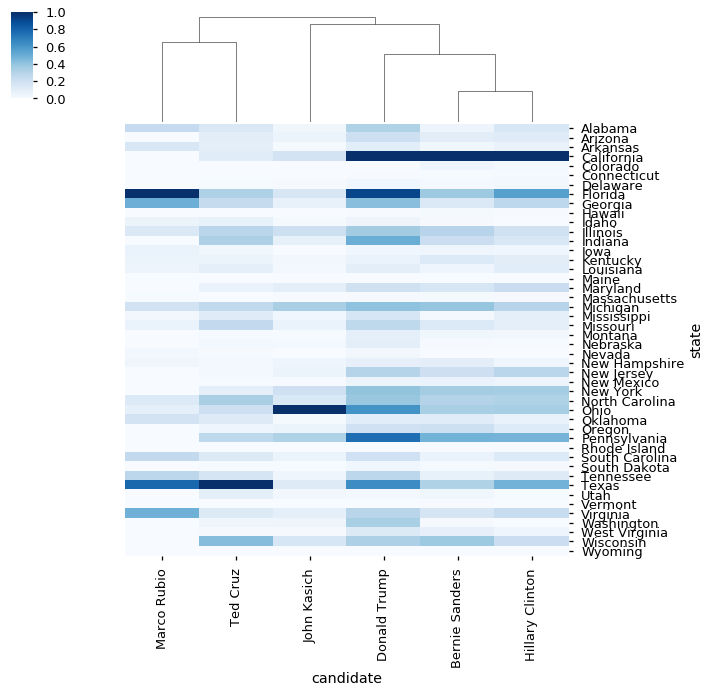

In [71]:
plt.figure(figsize=(10,20))
sns.set_context('talk', font_scale=1)
sns.clustermap(top_candidates, standard_scale=1, cmap='Blues', row_cluster=False,xticklabels=True, yticklabels=True )

Marco Rubio and Ted Cruz are clustered together which makes sense since they are both republican candidates with a similar number of people voting for them in each state. Rubio had the most votes in Florida which is the state where he is a senator. Cruz had the most votes in Texas which is the state where he is a senator. 
Hillary Clinton and Bernie Sanders are clustered together which also makes sense since they are both democratic candidates. They seem to have a similar number of votes in most states. Although Hillary was a senator in New York, that did not give her a spike in votes in that state.
What seems the most interesting to me is that Donald Trump is clustered with Hillary and Bernie in the second tier. This makes sense in terms of his popularity and is an indicator that he was the top candidate in the Republican party. It seems the votes for the democratic party were more split. 